# <div align = 'center'>`Feature Engineering and Feature Selection`</div>

* Running Recursive Feature Elimination and Sequential Feature Selector to check which are the important features.
* Checking on whether we can derive some new columns from the features present in the dataset.

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_data = pd.read_csv('Data/filled_train_28-03.csv')
train = train_data.copy()
train.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender,Months_Since_Deliquency,Interest_Rate
0,7000.0,0.0,68000.0,18.0,0.0,9.0,14.0,Rent,not verified,car,Female,NaN,1
1,30000.0,4.0,98367.0,15.0,0.0,12.0,24.0,Mortgage,VERIFIED - income,debt_consolidation,Female,17.0,3
2,24725.0,7.0,75566.0,16.0,0.0,12.0,16.0,Mortgage,VERIFIED - income,debt_consolidation,Male,NaN,3
3,17000.0,8.0,96000.0,22.0,1.0,19.0,30.0,Own,VERIFIED - income,debt_consolidation,Female,NaN,1
4,4500.0,2.0,30000.0,11.0,1.0,12.0,15.0,Rent,VERIFIED - income,credit_card,Male,NaN,3


In [3]:
train = train_data.copy()

In [4]:
train['Months_Since_Deliquency'] = train['Months_Since_Deliquency'].fillna(180)

In [5]:
#Applying one hot encoding to the 3 categorical columns
fs_data = pd.get_dummies(train)
fs_data.head()
#We will not drop first here since we want to see the effect of all the features.

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Months_Since_Deliquency,Interest_Rate,Home_Owner_Mortgage,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,7000.0,0.0,68000.0,18.0,0.0,9.0,14.0,180.0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,30000.0,4.0,98367.0,15.0,0.0,12.0,24.0,17.0,3,1,...,0,0,0,0,0,0,0,0,1,0
2,24725.0,7.0,75566.0,16.0,0.0,12.0,16.0,180.0,3,1,...,0,0,0,0,0,0,0,0,0,1
3,17000.0,8.0,96000.0,22.0,1.0,19.0,30.0,180.0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4500.0,2.0,30000.0,11.0,1.0,12.0,15.0,180.0,3,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
#Creating X and y for feature selectors
X = fs_data.drop('Interest_Rate',axis = 1)
y = fs_data['Interest_Rate']

###### Sequential Feature Selection

In [7]:
#Performing Sequential Feature Selector operation to see which features are playing a signinficant role in determining the interest rate.
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
fs = SFS(estimator = DecisionTreeClassifier(),
                     k_features = "best",
                     scoring = 'f1_weighted',
                     n_jobs = -1,
                     verbose = 0)
sfsmodel = fs.fit(X,y)
print('Best features for predicting Interest Rate:\n',sfsmodel.k_feature_names_)
print()
print('Overall best F1 Score:\n',sfsmodel.k_score_)

Best features for predicting Interest Rate:
 ('Loan_Amount_Requested', 'Inquiries_Last_6Mo', 'Home_Owner_None', 'Income_Verified_VERIFIED - income', 'Purpose_Of_Loan_car', 'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_moving')

Overall best F1 Score:
 0.4633196204324227


###### Recursive Feature Elimination

In [14]:
from sklearn.feature_selection import RFE
n = 11
rfe = RFE(DecisionTreeClassifier(),n_features_to_select = n)
rfe.fit(X,y)
print('Best {} features for predicting Interest Rate:\n {}'.format(n,X.columns[rfe.get_support()]))
print()
print(rfe.score(X,y))

Best 11 features for predicting Interest Rate:
 Index(['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts',
       'Total_Accounts', 'Months_Since_Deliquency', 'Home_Owner_Rent',
       'Purpose_Of_Loan_debt_consolidation', 'Gender_Male'],
      dtype='object')

0.9999929725437283


In [7]:
sfs_data = fs_data[['Loan_Amount_Requested', 'Inquiries_Last_6Mo', 'Home_Owner_None',
                       'Income_Verified_VERIFIED - income', 'Purpose_Of_Loan_car', 
                       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation', 
                       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement', 
                       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_moving']]

rfe_data = fs_data[['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts',
       'Total_Accounts', 'Months_Since_Deliquency', 'Home_Owner_Rent',
       'Purpose_Of_Loan_debt_consolidation', 'Gender_Male']]

In [8]:
sfs_data.shape,rfe_data.shape

((142299, 11), (142299, 11))

###### Checking correlation between the features

In [9]:
sfs_data.head()

,Loan_Amount_Requested,Inquiries_Last_6Mo,Home_Owner_None,Income_Verified_VERIFIED - income,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_moving
0,7000.0,0.0,0,0,1,0,0,0,0,0,0
1,30000.0,0.0,0,1,0,0,1,0,0,0,0
2,24725.0,0.0,0,1,0,0,1,0,0,0,0
3,17000.0,1.0,0,1,0,0,1,0,0,0,0
4,4500.0,1.0,0,1,0,1,0,0,0,0,0


In [10]:
rfe_data.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Months_Since_Deliquency,Home_Owner_Rent,Purpose_Of_Loan_debt_consolidation,Gender_Male
0,7000.0,0.0,68000.0,18.0,0.0,9.0,14.0,180.0,1,0,0
1,30000.0,4.0,98367.0,15.0,0.0,12.0,24.0,17.0,0,1,0
2,24725.0,7.0,75566.0,16.0,0.0,12.0,16.0,180.0,0,1,1
3,17000.0,8.0,96000.0,22.0,1.0,19.0,30.0,180.0,0,1,0
4,4500.0,2.0,30000.0,11.0,1.0,12.0,15.0,180.0,1,0,1


###### I feel the RFE data is better suited

In [11]:
#Importing all model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# ML Modelling

In [12]:
#Initialize all models
clf1 = LogisticRegression(random_state = 2)
clf2 = DecisionTreeClassifier(random_state = 2)
clf3 = RandomForestClassifier(random_state = 2)
clf4 = AdaBoostClassifier(random_state = 2)
clf5 = GradientBoostingClassifier(random_state = 2)
clf6 = XGBClassifier(random_state = 2)
clf7 = CatBoostClassifier(random_state = 2)

###### Building models using SFS data

In [13]:
X_sfs = sfs_data 

In [23]:
#Using Cross Validation with all the above models to get the first baseline score
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X_sfs,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.4156 Variance Error:  0.0063
DTC Average Score (f1):  0.4632 Variance Error:  0.0051
RF Average Score (f1):  0.4663 Variance Error:  0.0054
AdaBst Average Score (f1):  0.4441 Variance Error:  0.0032
GBC Average Score (f1):  0.4505 Variance Error:  0.0025
XGB Average Score (f1):  0.4756 Variance Error:  0.0058
CAT Average Score (f1):  0.4743 Variance Error:  0.0038


###### Building models using RFE

In [14]:
X_rfe = rfe_data

In [25]:
#Using Cross Validation with all the above models to get the first baseline score
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X_rfe,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.4227 Variance Error:  0.0213
DTC Average Score (f1):  0.4149 Variance Error:  0.0066
RF Average Score (f1):  0.4784 Variance Error:  0.0018
AdaBst Average Score (f1):  0.4853 Variance Error:  0.0038
GBC Average Score (f1):  0.4885 Variance Error:  0.0025
XGB Average Score (f1):  0.5022 Variance Error:  0.0022
CAT Average Score (f1):  0.5028 Variance Error:  0.0014


In [15]:
pd.concat((X_rfe,y),axis = 1).to_csv('Data/RFE_Data.csv',index = False)

###### Trying to create new columns out of these features.

In [16]:
feat_data = pd.read_csv('Data/RFE_Data.csv')
data = feat_data.copy()

In [17]:
#Divide Debt_To_Income by 100 since formula is debt/income *100
data['Debt_To_Income'] = data['Debt_To_Income']/100
#Create a column called monthly income
data['Monthly_Income'] = round(data['Annual_Income']/12,2)
#Create a column called monthly_debt
data['Monthly_Debt'] = round(data['Debt_To_Income']*data['Monthly_Income'],2)
#Create a feature called disposable income to see how much income is left in a month
data['Disposable_Income'] = data['Monthly_Income']-data['Monthly_Debt']
#Create a column called EMI after paying off all debts considering 40% of disposable_income would cover debt.
data['Affordable_EMI'] = data['Disposable_Income']*0.40 #Usually banks consider 45-50% of your income as what a person can afford for EMI's.
#Create a column called min duration for minimum loan duration at 1% interest_Rate.
data['Min Duration without interest'] = round(data['Loan_Amount_Requested']/data['Affordable_EMI'],2)
#Create a column called Number_Closed_Accounts
data['Number_Closed_Accounts'] = data['Total_Accounts']-data['Number_Open_Accounts']

In [18]:
data.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts',
       'Total_Accounts', 'Months_Since_Deliquency', 'Home_Owner_Rent',
       'Purpose_Of_Loan_debt_consolidation', 'Gender_Male', 'Interest_Rate',
       'Monthly_Income', 'Monthly_Debt', 'Disposable_Income', 'Affordable_EMI',
       'Min Duration without interest', 'Number_Closed_Accounts'],
      dtype='object')

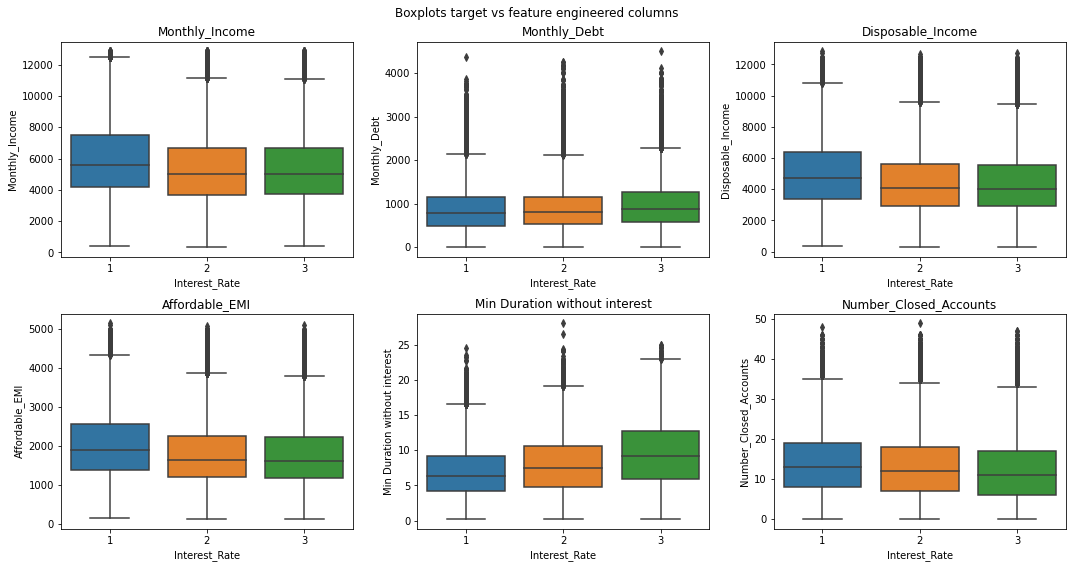

In [19]:
#Performing visualizations to see if new features have predictive power with boxplots
columns = data[['Monthly_Income', 'Monthly_Debt', 'Disposable_Income', 'Affordable_EMI',
       'Min Duration without interest', 'Number_Closed_Accounts']]
fig,ax = plt.subplots(2,3,figsize = (15,8))
for variables,plotsubs in zip(columns.columns,ax.flatten()):
    plotsubs.set_title(variables)
    sns.boxplot(data['Interest_Rate'],columns[variables],ax = plotsubs)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.92)
fig.suptitle('Boxplots target vs feature engineered columns')
plt.show()

###### Inferences

* All the feature engineered columns seem to have some differences in their mean for each target category.


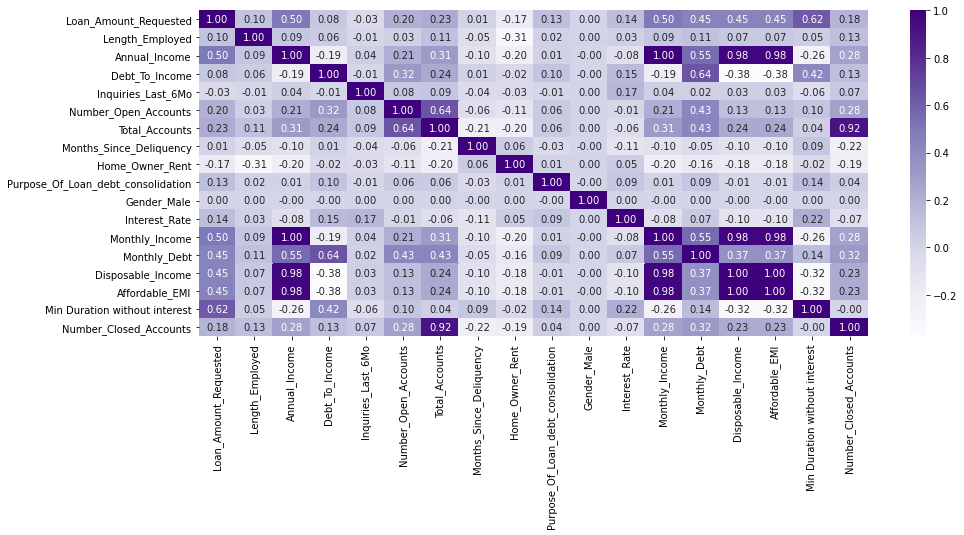

In [20]:
#Checking correlation
plt.figure(figsize = (15,6))
sns.heatmap(data.corr(),annot = True,fmt = '.2f',cmap = 'Purples')
plt.show()

In [26]:
#Performing RFE on this new dataset to finally have 11 features
X_data = data.drop('Interest_Rate',axis = 1)
y = data['Interest_Rate']
from sklearn.feature_selection import RFE
n = 11
rfe = RFE(DecisionTreeClassifier(),n_features_to_select = n)
rfe.fit(X_data,y)
print('Best {} features for predicting Interest Rate:\n {}'.format(n,X_data.columns[rfe.get_support()]))
print()
print(rfe.score(X_data,y))

Best 11 features for predicting Interest Rate:
 Index(['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Number_Open_Accounts', 'Total_Accounts', 'Months_Since_Deliquency',
       'Monthly_Debt', 'Disposable_Income', 'Affordable_EMI',
       'Min Duration without interest', 'Number_Closed_Accounts'],
      dtype='object')

0.9999297254372834


In [27]:
#All our feature engineered variables made it after running RFE
new_rfe_data = data[['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Number_Open_Accounts', 'Total_Accounts', 'Months_Since_Deliquency',
       'Monthly_Debt', 'Disposable_Income', 'Affordable_EMI',
       'Min Duration without interest', 'Number_Closed_Accounts']]
new_rfe_data.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Number_Open_Accounts,Total_Accounts,Months_Since_Deliquency,Monthly_Debt,Disposable_Income,Affordable_EMI,Min Duration without interest,Number_Closed_Accounts
0,7000.0,0.0,68000.0,9.0,14.0,180.0,1020.00,4646.67,1858.668,3.77,5.0
1,30000.0,4.0,98367.0,12.0,24.0,17.0,1229.59,6967.66,2787.064,10.76,12.0
2,24725.0,7.0,75566.0,12.0,16.0,180.0,1007.55,5289.62,2115.848,11.69,4.0
3,17000.0,8.0,96000.0,19.0,30.0,180.0,1760.00,6240.00,2496.000,6.81,11.0
4,4500.0,2.0,30000.0,12.0,15.0,180.0,275.00,2225.00,890.000,5.06,3.0


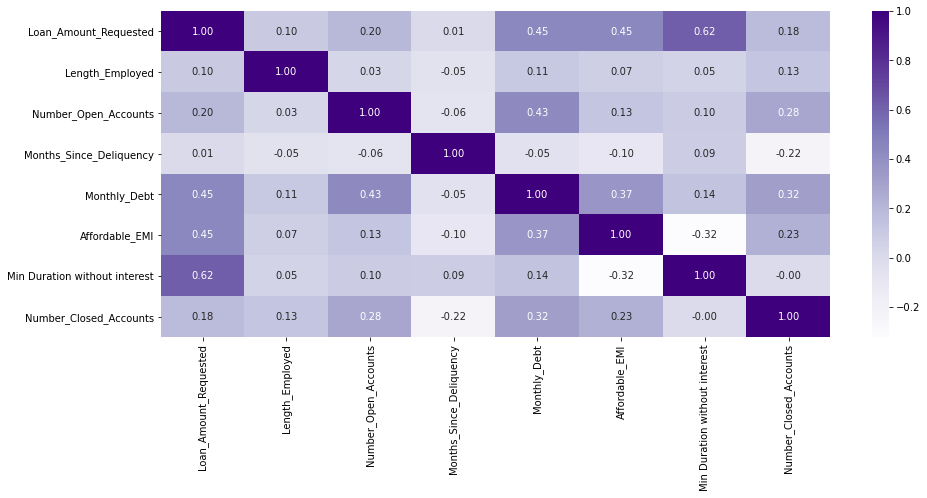

In [29]:
#Checking correlation
plt.figure(figsize = (15,6))
sns.heatmap(new_rfe_data.drop(['Annual_Income','Disposable_Income','Total_Accounts'],axis = 1).corr(),annot = True,fmt = '.2f',cmap = 'Purples')
plt.show()

In [69]:
#Using Cross Validation with all the above models to get the first baseline score
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,new_rfe_data,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.4211 Variance Error:  0.0036
DTC Average Score (f1):  0.41 Variance Error:  0.0047
RF Average Score (f1):  0.4762 Variance Error:  0.0037
AdaBst Average Score (f1):  0.484 Variance Error:  0.0038
GBC Average Score (f1):  0.4887 Variance Error:  0.0065
XGB Average Score (f1):  0.4983 Variance Error:  0.0035
CAT Average Score (f1):  0.4991 Variance Error:  0.0042


# Combining all the new features with the existing features and running rfe

In [3]:
full_data = train_data.copy()

In [4]:
full_data.shape

(142299, 13)

###### Applying all the feature engineering columns here.


In [5]:
#Divide Debt_To_Income by 100 since formula is debt/income *100
full_data['Debt_To_Income'] = full_data['Debt_To_Income']/100
#Create a column called monthly income
full_data['Monthly_Income'] = round(full_data['Annual_Income']/12,2)
#Create a column called monthly_debt
full_data['Monthly_Debt'] = round(full_data['Debt_To_Income']*full_data['Monthly_Income'],2)
#Create a feature called disposable income to see how much income is left in a month
full_data['Disposable_Income'] = full_data['Monthly_Income']-full_data['Monthly_Debt']
#Create a column called EMI after paying off all debts considering 40% of disposable_income would cover debt.
full_data['Affordable_EMI'] = full_data['Disposable_Income']*0.40 #Usually banks consider 45-50% of your income as what a person can afford for EMI's.
#Create a column called min duration for minimum loan duration at 1% interest_Rate.
full_data['Min Duration without interest'] = round(full_data['Loan_Amount_Requested']/full_data['Affordable_EMI'],2)
#Create a column called Number_Closed_Accounts
full_data['Number_Closed_Accounts'] = full_data['Total_Accounts']-full_data['Number_Open_Accounts']

In [6]:
full_data.shape

(142299, 19)

In [7]:
#Applying One hot encoding to the categorical with drop first
X_model = pd.get_dummies(full_data,drop_first = True).drop(['Interest_Rate','Months_Since_Deliquency'],axis=1)
y = full_data['Interest_Rate']

In [8]:
#Importing all model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [9]:
#Initialize all models
clf1 = LogisticRegression(random_state = 2)
clf2 = DecisionTreeClassifier(random_state = 2)
clf3 = RandomForestClassifier(random_state = 2)
clf4 = AdaBoostClassifier(random_state = 2)
clf5 = GradientBoostingClassifier(random_state = 2)
clf6 = XGBClassifier(random_state = 2)
clf7 = CatBoostClassifier(random_state = 2)

In [14]:
#Building a model with full_data
#Using Cross Validation with all the above models to get the first baseline score
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X_model,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.4139 Variance Error:  0.008
DTC Average Score (f1):  0.4177 Variance Error:  0.0023
RF Average Score (f1):  0.4809 Variance Error:  0.0043
AdaBst Average Score (f1):  0.492 Variance Error:  0.0036
GBC Average Score (f1):  0.4925 Variance Error:  0.0039
XGB Average Score (f1):  0.5047 Variance Error:  0.0042
CAT Average Score (f1):  0.5051 Variance Error:  0.0043


In [10]:
#Trying Same model with Months_Since_Deliquency as the mean
#Applying One hot encoding to the categorical with drop first
X_model = pd.get_dummies(full_data,drop_first = True).drop(['Interest_Rate'],axis=1)
X_model['Months_Since_Deliquency'] = X_model['Months_Since_Deliquency'].fillna(180)
y = full_data['Interest_Rate']

In [11]:
#Building a model with full_data
#Using Cross Validation with all the above models to get the first baseline score
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X_model,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.4209 Variance Error:  0.0029
DTC Average Score (f1):  0.4253 Variance Error:  0.0067
RF Average Score (f1):  0.4998 Variance Error:  0.0028
AdaBst Average Score (f1):  0.5113 Variance Error:  0.0045
GBC Average Score (f1):  0.5143 Variance Error:  0.0038
XGB Average Score (f1):  0.524 Variance Error:  0.002
CAT Average Score (f1):  0.5258 Variance Error:  0.0033


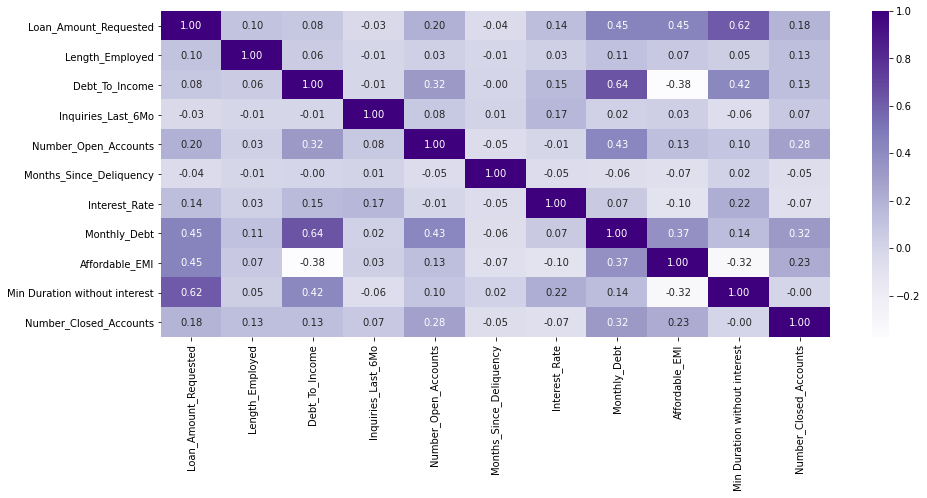

In [34]:
#Checking correlation among all the columns
plt.figure(figsize = (15,6))
sns.heatmap(full_data.drop(['Annual_Income','Monthly_Income','Disposable_Income','Total_Accounts'],axis = 1).corr(),annot = True,fmt = '.2f',cmap = 'Purples')
plt.show()

In [17]:
#We can drop 'Annual_Income','Monthly_Income','Disposable_Income','Total_Accounts'
new_data = full_data.copy()
new_data = new_data.drop(['Annual_Income','Monthly_Income','Disposable_Income','Total_Accounts'],axis = 1)

In [25]:
#Let us run a model with these changes.
new_model_data = pd.get_dummies(new_data,drop_first = True)
new_model_data['Months_Since_Deliquency'] = new_model_data['Months_Since_Deliquency'].fillna(180)
new_model_data.head()
X_new = new_model_data.drop('Interest_Rate',axis = 1)
y = new_model_data['Interest_Rate']

In [26]:
#Building a model with full_data
#Using Cross Validation with all the above models to get the first baseline score
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X_new,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  0.422 Variance Error:  0.0047
DTC Average Score (f1):  0.4264 Variance Error:  0.0044
RF Average Score (f1):  0.5028 Variance Error:  0.0052
AdaBst Average Score (f1):  0.5118 Variance Error:  0.0044
GBC Average Score (f1):  0.5137 Variance Error:  0.0036
XGB Average Score (f1):  0.5243 Variance Error:  0.0022
CAT Average Score (f1):  0.5257 Variance Error:  0.0035


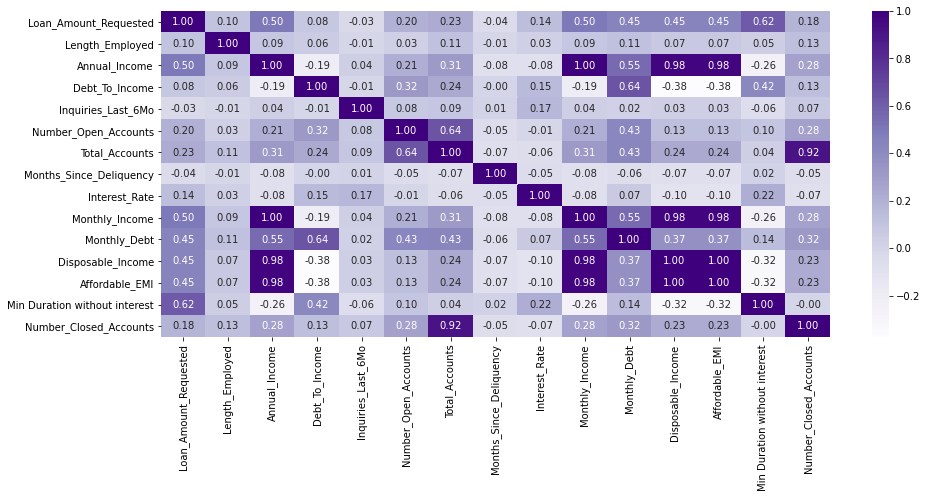

In [35]:
#Checking correlation among all the columns
plt.figure(figsize = (15,6))
sns.heatmap(full_data.drop([],axis = 1).corr(),annot = True,fmt = '.2f',cmap = 'Purples')
plt.show()

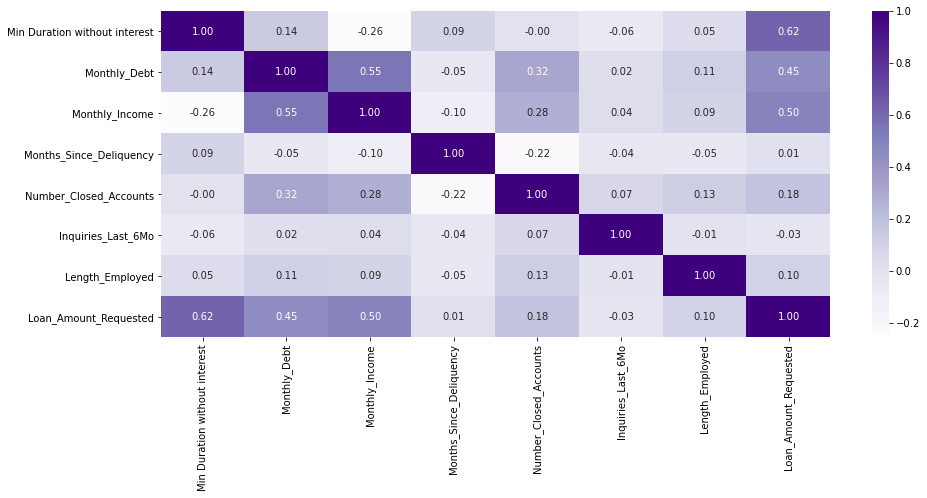

In [42]:
#Creating a dataset containing only columns that have high correlation with interest rate
X_filtered=full_data[['Min Duration without interest','Monthly_Debt','Monthly_Income','Months_Since_Deliquency',
           'Number_Closed_Accounts','Inquiries_Last_6Mo','Length_Employed',
           'Loan_Amount_Requested']]
X_filtered['Months_Since_Deliquency'] = X_filtered['Months_Since_Deliquency'].fillna(180)
y = full_data['Interest_Rate']
plt.figure(figsize = (15,6))
sns.heatmap(X_filtered.corr(),annot = True,fmt = '.2f',cmap = 'Purples')
plt.show()

In [41]:
#Building a model with full_data
#Using Cross Validation with all the above models to get the first baseline score
mod = [clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name = ['LR','DTC','RF','AdaBst','GBC','XGB','CAT']
for i,j in zip(mod,mod_name):
    scores = cross_val_score(i,X_filtered,y,scoring = 'f1_weighted',cv = 5,n_jobs = -1)
    avg_score = round(np.mean(scores),4)
    var_score = round(np.std(scores)/avg_score,4)
    print(j,'Average Score (f1): ',avg_score,'Variance Error: ',var_score)

LR Average Score (f1):  nan Variance Error:  nan
DTC Average Score (f1):  nan Variance Error:  nan
RF Average Score (f1):  nan Variance Error:  nan
AdaBst Average Score (f1):  nan Variance Error:  nan
GBC Average Score (f1):  nan Variance Error:  nan
XGB Average Score (f1):  0.4965 Variance Error:  0.0059
CAT Average Score (f1):  0.4961 Variance Error:  0.004


###### My overall conclusion is that after trying a lot of feature engineering and dropping and removing features there has not been any improvement in performance. This leads me to believe that no amount of feature creation from the existing data is going to help in improving the model.

* **Recursive Feature Elimination**
 - RFE is a backward elimination technique that would pick the best 'n' features specified by us.


 - **Features Selected:**
['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income','Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts','Total_Accounts', 'Months_Since_Deliquency', 'Home_Owner_Rent','Purpose_Of_Loan_debt_consolidation', 'Gender_Male']


* **Sequential Feature Selector**


- SFS, a part of the mlxtend library allows for both forward selection and backward elimination.


- **Features Selected:**
['Loan_Amount_Requested', 'Inquiries_Last_6Mo', 'Home_Owner_None', 'Income_Verified_VERIFIED - income','Purpose_Of_Loan_car', 'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation','Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement','Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_moving']


* The difference between RFE and SFS is that in RFE, the library does not have the ability to pick the "best" features from the dataset. Whereas with SFS, we can select the "best" features according to the algorithm. However the speed of SFS is much slower compared to RFE.